In [2]:
# 添加项目 PYTHONPATH
import sys
import os
current_dir = os.path.abspath("")

project_root = os.path.abspath(os.path.join(current_dir,"../../"))

sys.path.append(project_root)

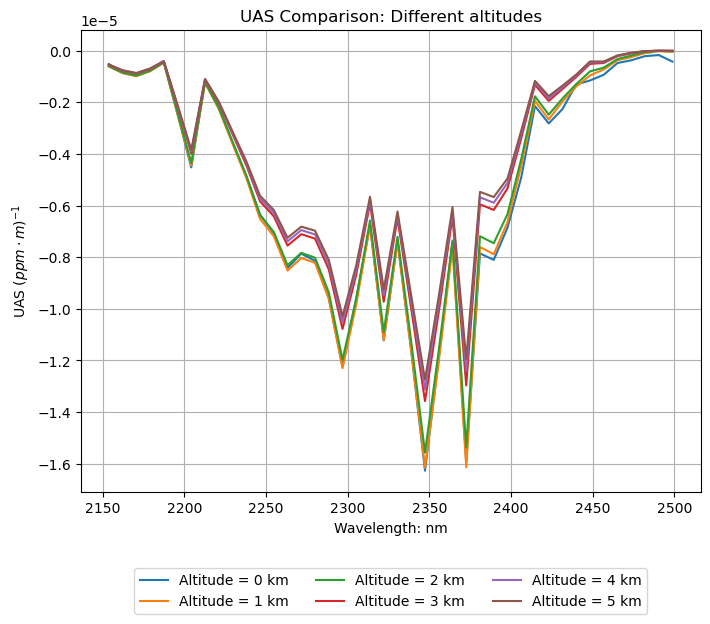

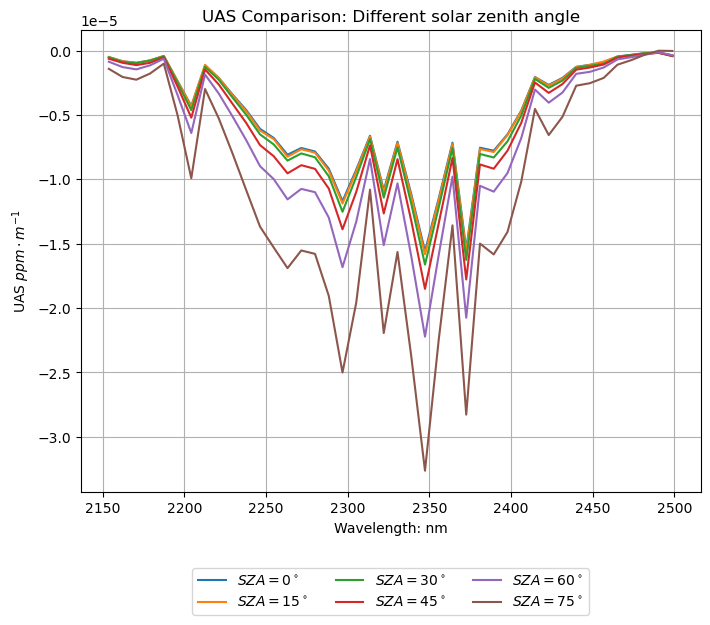

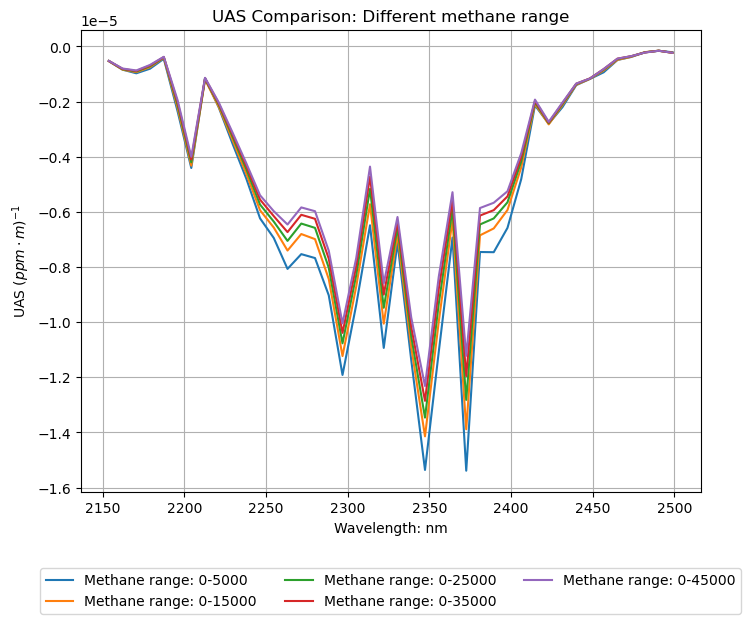

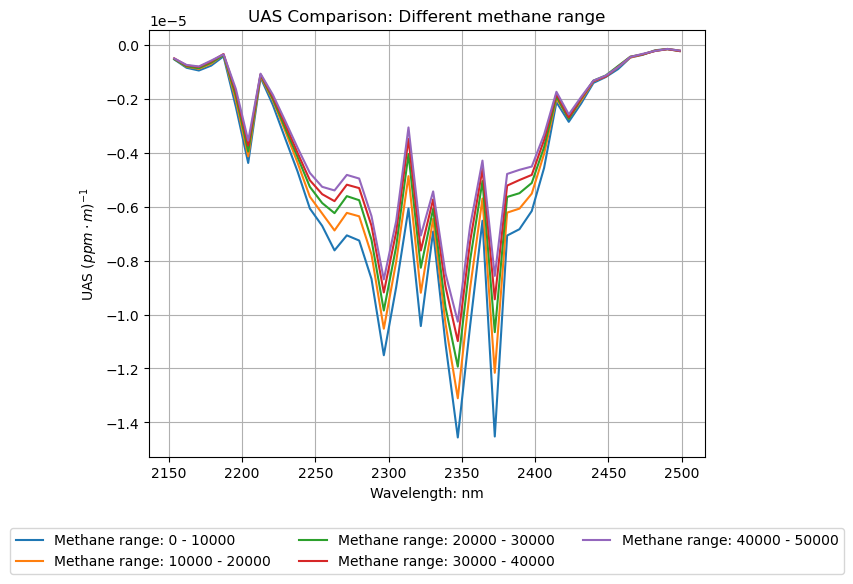

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

from utils.satellites_data import general_functions as gf
from utils import satellites_data as sd
from utils import generate_radiance_lut_and_uas as glut
from utils import simulate_images as si
from methane_retrieval_algorithms.matchedfilter import matched_filter as mf

wvls, general_uas = glut.generate_satellite_uas_for_specific_range_from_lut(
    "AHSI", 0, 50000, 2150, 2500, 25, 0
)

# 参数设置
start = 0
end_range = 50000
step_1 = 10000  # 图一的尾部间隔
step_2 = 10000  # 图二的固定间隔

# # 图一：头部固定为 0，尾部从 5000 到 50000，间隔逐步增加
# plt.figure(figsize=(8, 6))
# for end in range(5000, end_range + 1, step_1):
#     x, uas = glut.generate_satellite_uas_for_specific_range_from_lut(
#         "AHSI", 0, end, 2150, 2500, 55, 0
#     )
#     plt.plot(x, uas, label=f'Range: 0-{end}')

# plt.title("UAS Comparison: Different Range")
# plt.xlabel("Wavelength: nm")
# plt.ylabel("UAS")
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # 图例放在底部，分成3列
# plt.grid(True)

# # 图二：固定间隔 10000，从 0-10000 到 40000-50000
# plt.figure(figsize=(8, 6))
# for start in range(0, end_range, step_2):
#     end = start + step_2
#     x, uas = glut.generate_satellite_uas_for_specific_range_from_lut(
#         "AHSI", start, end, 2150, 2500, 25, 0
#     )
#     plt.plot(x, uas, label=f'Range: {start}-{end}')

# plt.title("UAS Comparison: Interval Fixed at 10000")
# plt.xlabel("Wavelength: nm")
# plt.ylabel("UAS")
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # 图例放在底部，分成3列
# plt.grid(True)

# # 显示图像
# plt.show()

# # 图二：固定间隔 10000，从 0-10000 到 40000-50000
# szas = [0, 15, 30, 45, 60, 75,85]
# plt.figure(figsize=(8, 6))
# for sza in szas:
#     x, uas = glut.generate_satellite_uas_for_specific_range_from_lut(
#         "AHSI", 0, 2500, 2150, 2500, sza, 0
#     )
#     plt.plot(x, uas, label=f'SZA = {sza}°')

# plt.title("UAS Comparison: Different SZA")
# plt.xlabel("Wavelength: nm")
# plt.ylabel(r"UAS $ppmm^{-1}$")
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # 图例放在底部，分成3列
# plt.grid(True)

# # 显示图像
# plt.show()

# 图二：固定间隔 10000，从 0-10000 到 40000-50000
altitudes = [0,1,2,3,4,5]
plt.figure(figsize=(8, 6))
for altitude in altitudes:
    x, uas = glut.generate_satellite_uas_for_specific_range_from_lut(
        "AHSI", 0, 2500, 2150, 2500, 25, altitude
    )
    plt.plot(x, uas, label=f'Altitude = {altitude} km')

plt.title("UAS Comparison: Different altitudes")
plt.xlabel("Wavelength: nm")
plt.ylabel(r"UAS $(ppm\cdot m)^{-1}$")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # 图例放在底部，分成3列
plt.grid(True)

plt.savefig("UAS_comparison_altitude.pdf", format="pdf", bbox_inches="tight")
# 显示图像
plt.show()

szas = [0,15,30,45,60,75]
plt.figure(figsize=(8, 6))
for sza in szas:
    x, uas = glut.generate_satellite_uas_for_specific_range_from_lut(
        "AHSI", 0, 2500, 2150, 2500, sza, 0
    )
    plt.plot(x, uas, label=fr'$SZA = {sza}^\circ$')

plt.title("UAS Comparison: Different solar zenith angle")
plt.xlabel("Wavelength: nm")
plt.ylabel(r"UAS $ppm\cdot m^{-1}$")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # 图例放在底部，分成3列
plt.grid(True)

plt.savefig("UAS_comparison_sza.pdf", format="pdf", bbox_inches="tight")
# 显示图像
plt.show()

# 参数设置
start = 0
end_range = 50000
step_1 = 10000  # 图一的尾部间隔
step_2 = 10000  # 图二的固定间隔

# # 图一：头部固定为 0，尾部从 5000 到 50000，间隔逐步增加
plt.figure(figsize=(8, 6))
for end in range(5000, end_range + 1, step_1):
    x, uas = glut.generate_satellite_uas_for_specific_range_from_lut(
        "AHSI", 0, end, 2150, 2500, 25, 0
    )
    plt.plot(x, uas, label=f'Methane range: 0-{end}')

plt.title("UAS Comparison: Different methane range")
plt.xlabel("Wavelength: nm")
plt.ylabel(r"UAS $(ppm\cdot m)^{-1}$")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # 图例放在底部，分成3列
plt.grid(True)

plt.savefig("UAS_comparison_range.pdf", format="pdf", bbox_inches="tight")
# 显示图像
plt.show()

# 参数设置
start = 0
end_range = 50000
step_1 = 5000  # 图一的尾部间隔
step_2 = 10000  # 图二的固定间隔

# # 图一：头部固定为 0，尾部从 5000 到 50000，间隔逐步增加
plt.figure(figsize=(8, 6))
for start in range(0, 50000, step_2):
    x, uas = glut.generate_satellite_uas_for_specific_range_from_lut(
        "AHSI", start, start+step_2, 2150, 2500, 25, 0
    )
    plt.plot(x, uas, label=f'Methane range: {start} - {start+step_2}')

plt.title("UAS Comparison: Different methane range")
plt.xlabel("Wavelength: nm")
plt.ylabel(r"UAS $(ppm\cdot m)^{-1}$")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # 图例放在底部，分成3列
plt.grid(True)

plt.tight_layout()
plt.savefig("UAS_comparison_start.pdf", format="pdf", bbox_inches="tight")

# 显示图像
plt.show()



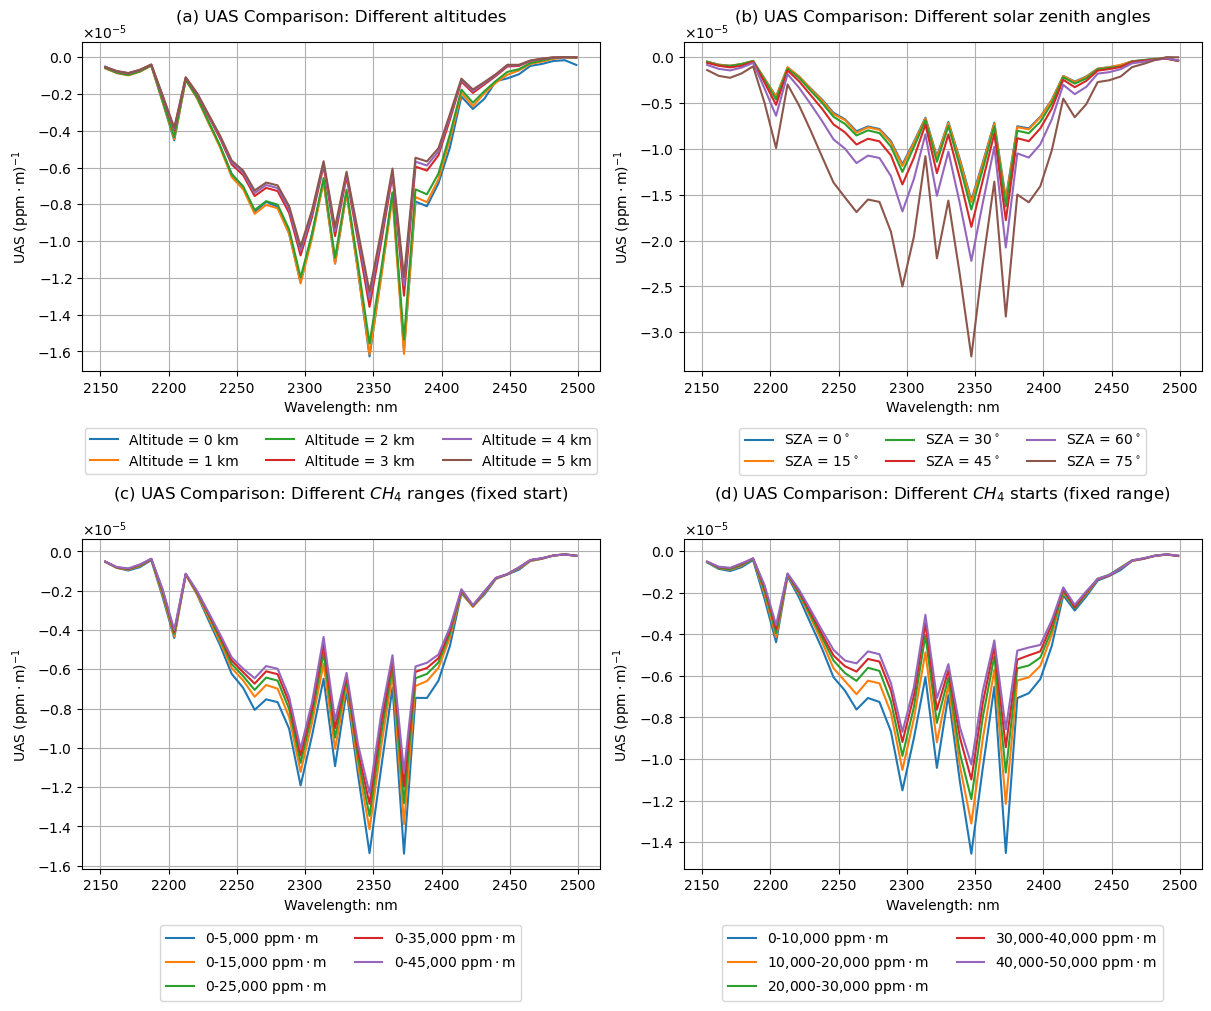

In [15]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
# 初始化大图和子图，使用 constrained_layout=True 让布局自动调整
fig, axs = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)
axs[0,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[0,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[1,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[1,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# (a) UAS Comparison: Different altitude
altitudes = [0, 1, 2, 3, 4, 5]
for altitude in altitudes:
    x, uas = glut.generate_satellite_uas_for_specific_range_from_lut("AHSI", 0, 2500, 2150, 2500, 25, altitude)
    axs[0, 0].plot(x, uas, label=f'Altitude = {altitude} km')
axs[0, 0].set_title("(a) UAS Comparison: Different altitudes", pad=15)
axs[0, 0].set_xlabel("Wavelength: nm")
axs[0, 0].set_ylabel(r"UAS $(\text{ppm} \cdot \text{m})^{-1}$")
axs[0, 0].grid(True)
axs[0, 0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # 图例放在底部，分成3列

# (b) UAS Comparison: Different solar zenith angle
szas = [0, 15, 30, 45, 60, 75]
for sza in szas:
    x, uas = glut.generate_satellite_uas_for_specific_range_from_lut("AHSI", 0, 2500, 2150, 2500, sza, 0)
    axs[0, 1].plot(x, uas, label=fr'SZA = ${sza}^\circ$')
axs[0, 1].set_title("(b) UAS Comparison: Different solar zenith angles", pad=15)
axs[0, 1].set_xlabel("Wavelength: nm")
axs[0, 1].set_ylabel(r"UAS $(\text{ppm} \cdot \text{m})^{-1}$")
axs[0, 1].grid(True)
axs[0, 1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # 图例放在底部，分成3列

# (c) UAS Comparison: Methane range (fixed start)
start = 0
end_range = 50000
step_1 = 10000
for end in range(5000, end_range + 1, step_1):
    x, uas = glut.generate_satellite_uas_for_specific_range_from_lut("AHSI", 0, end, 2150, 2500, 25, 0)
    axs[1, 0].plot(x, uas, label=fr'0-{end:,} $ \text{{ppm}} \cdot \text{{m}} $')
axs[1, 0].set_title(r"(c) UAS Comparison: Different $CH_4$ ranges (fixed start)", pad=15)
axs[1, 0].set_xlabel("Wavelength: nm")
axs[1, 0].set_ylabel(r"UAS $(\text{ppm} \cdot \text{m})^{-1}$")
axs[1, 0].grid(True)
axs[1, 0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)  # 图例放在底部，分成3列

# (d) UAS Comparison: Methane range (sliding)
step_2 = 10000
for start in range(0, 50000, step_2):
    x, uas = glut.generate_satellite_uas_for_specific_range_from_lut("AHSI", start, start + step_2, 2150, 2500, 25, 0)
    axs[1, 1].plot(x, uas, label=rf'{start:,}-{start+step_2:,} $ \text{{ppm}} \cdot \text{{m}} $')
axs[1, 1].set_title(r"(d) UAS Comparison: Different $CH_4$ starts (fixed range)", pad=15)
axs[1, 1].set_xlabel("Wavelength: nm")
axs[1, 1].set_ylabel(r"UAS $(\text{ppm} \cdot \text{m})^{-1}$")
axs[1, 1].grid(True)
axs[1, 1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)  # 图例放在底部，分成3列
# 添加总标题
# fig.suptitle("UAS Comparisons Across Different Conditions", fontsize=16)

# 保存图像
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)  # 图例放在底部，分成3列
plt.savefig("UAS_comparison_combined_fixed.pdf", format="pdf", bbox_inches="tight")
plt.show()